In [2]:
import requests
from bs4 import BeautifulSoup

## Google parse

In [11]:
url = 'https://www.google.com/search?q=amazon+a+dance+with+dragons'


ua = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}                                                                

response = requests.get(url, headers=ua)
content = response.content

# Parse for amazon link
soup = BeautifulSoup(content, 'html.parser')

for link in soup.find_all('a'):
    url = str(link.get('href'))
    if 'www.amazon.com' in url:
        print(url)


https://www.amazon.com/Dance-Dragons-Song-Ice-Fire/dp/0553582011
https://webcache.googleusercontent.com/search?q=cache:JFAnvmpYHPkJ:https://www.amazon.com/Dance-Dragons-Song-Ice-Fire/dp/0553582011+&cd=1&hl=en&ct=clnk&gl=us
/search?q=related:https://www.amazon.com/Dance-Dragons-Song-Ice-Fire/dp/0553582011+amazon+a+dance+with+dragons&tbo=1&sa=X&ved=0ahUKEwj-r5iBnNvYAhUGKGMKHZqRCAMQHwgrMAA
https://www.amazon.com/Dance-Dragons-Song-Fire-Book-ebook/dp/B003YL4LYI
https://webcache.googleusercontent.com/search?q=cache:qoPNQD2X3q8J:https://www.amazon.com/Dance-Dragons-Song-Fire-Book-ebook/dp/B003YL4LYI+&cd=2&hl=en&ct=clnk&gl=us
/search?q=related:https://www.amazon.com/Dance-Dragons-Song-Fire-Book-ebook/dp/B003YL4LYI+amazon+a+dance+with+dragons&tbo=1&sa=X&ved=0ahUKEwj-r5iBnNvYAhUGKGMKHZqRCAMQHwgxMAE
https://www.amazon.com/Dance-Dragons-Song-Fire-Book/dp/B005C7QVUE
https://webcache.googleusercontent.com/search?q=cache:_VHtbmP3gswJ:https://www.amazon.com/Dance-Dragons-Song-Fire-Book/dp/B005C7QVUE+

## Amazon parse

In [20]:
link = 'https://www.amazon.com/Halloween-Tree-Ray-Bradbury/dp/0375803017'
    
ua = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}                                                                

response = requests.get(link, headers=ua)
content = response.content

# Parse for amazon link
soup = BeautifulSoup(content, 'html.parser')


<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="//images-na.ssl-images-amazon.com" rel="dns-prefetch"/><link href="//m.media-amazon.com" rel="dns-prefetch"/><link href="//completion.amazon.com" rel="dns-prefetch"/><script type="text/javascript">

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){if(1==window.ueinit)try{return b.apply(this,arguments
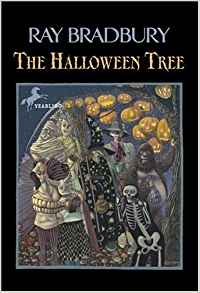

In [21]:
print(str(soup))

In [22]:
# Title
try:
    print(soup.find_all(id='productTitle'))
    title = soup.find_all(id='productTitle')[0].contents[0]
    #print(title)
except:
    print("couldn't find title")

    
    
    
# Author
try:
    author = soup.find_all(class_ = 'a-link-normal contributorNameID')[0].contents[0]
    #print(author)
except:
    print("couldn't find title")
    
    
# ISBN-10
try:
    book_details = soup.findAll(id = 'detail-bullets')
    
    for line in str(book_details[0]).split('\n'):
        if 'ISBN-10' in line:
            print(line[20:30])
        
    #print(str(book_details[0]).split('\n'))
    
    #print(str(book_details).split('\n'))
except:
    print("couldn't find isbn 13")

[<span class="a-size-large" id="productTitle">The Halloween Tree</span>]
0375803017
